**Title**: Classifying Exo-Planet Types

**Introduction**:

When searching for earth-like planets in our galaxy, scientists are able to determine a planet’s radius, the planetary radius, and distance from its sun, also known as the orbital radius (Jones et al, 2008; Otegi et al, 2020). These two characteristics help determine the composition and density of planets and, ultimately, whether or not a planet is habitable. NASA states that a potentially habitable planet is a planet that can sustain life for a significant period, requiring water, energy and nutrients, although this definition of a habitable planet changes as new discoveries are made (NASA, 2023). The size of a planet is critical for habitability because it must have enough gravity to hold water on its surface (Jones, 2008). The distance from a sun is also indicative of habitability as this relates to temperature, which in turn affects if water can exist on the surface in liquid form (Jones, 2008). The distance in which water can exist on the planet is known as the habitable zone (NASA, 2023)

When scientists identify a new exoplanet - a planet that is found outside of our solar system - they typically classify it as either Neptune-like, Gas-Giant, Super Earth, Terrestrial or Unknown. The type of planet can be indicative of habitability as well. Gaseous planets, like Gas-Giants, are considered uninhabitable because, while they may have a core of rock or metal, the surface is under extreme pressure from the rest of the planet and they lack a solid surface to stand on (Papiewski, 2019). Super-Earths may be rocky, but often lack atmospheres, making them also uninhabitable (NASA, 2023). On the other hand, terrestrial planets, like our own, have in the past been found to be the right size and distance from a sun to support water. 

For this reason, we are attempting to look at the planet’s radius and orbital radius from their sun in order to classify it into one of the following categories: Neptune-like, Gas-Giant, Super Earth, Terrestrial and Unknown. This will help us answer the question: Given orbital radius and planetary radius, can we accurately classify exoplanets? Answering this question can help screen planets so that only terrestrial planets are investigated for habitability in the future. To address this question, we will be using the dataset “NASA Exoplanets” obtained from the website Kaggle. This dataset contains a comprehensive archive of all of the planets outside of our solar system, known as exoplanets, that NASA has discovered. It includes information on each planet’s name, brightness, year of discovery, distance from Earth, orbital radius, radius, mass and planet type.

**Methods**:

*Loading Data*

In order to work with our data set, we loaded the required notebooks onto our Jupyter notebook. We then loaded our data from a Google Sheet on the web to Jupyter using the read_csv() function. The first 10 lines of the data set were printed using the head() function. 

**Table 1: Original Exoplanet Data**: first 10 rows of exoplanet data, unwrangled and untidied

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)

data <- read_csv("https://drive.google.com/uc?export=download&id=1DFDwrd-1pEzLSik8UhBRZsVjOfAkRI4B")
head(data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.1.3”
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ pars

name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.8925394,0.23,Radial Velocity
11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.4000000,0.08,Radial Velocity
14 Andromedae b,246,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.5086927,0.00,Radial Velocity
14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.8000000,0.37,Radial Velocity
16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.2000000,0.68,Radial Velocity
17 Scorpii b,408,5.22606,Gas Giant,2020,4.32000,Jupiter,1.15,Jupiter,1.450000,1.6000000,0.06,Radial Velocity


*Tidying the data*

Certain variables in the data had information split up between two columns, including the radius of the planet, which we planned to use in our analysis. Specifically, information about the radius was stored in the column radius_wrt, with the name of a planet in our solar system that the given planet could be compared to, and radius_multiplier, which contained a multiplier of the planet in radius_wrt. To convert the data into a format that we could use for our analysis, we had to combine the information from these two columns, to produce a single radius value. Planets differed in what they were measured with respect to (Earth vs Jupiter). To standardize radii, we created a column called radius_wrt_num. For all planets in which radius_wrt was Earth, the value of this column was set to 1  and for all those with Jupiter, this value was 11.2. As the size of Jupiter is approximately 11.2 times greater than Earth, this change allowed us to then compute all of the radii relative to Earth by multiplying the radius_wrt_num column by the radius_multiplier column. This new value was stored in a new column called  planetary_radius_prop and radius_wrt_num was removed from the data set. 


In addition, we used subset() to ensure that we only kept data points that did not have empty variables for planetary_radius_prop or orbital_radius and converted planet_type to a factor.

**Table 2: Clean Exoplanet Data**: first 10 rows of modified exoplanet data, with new column, planetary_radius_prop, that represents the planetary radius in relation to Earth

In [3]:
data$radius_wrt_num[data$radius_wrt == "Earth"] <- 1
data$radius_wrt_num[data$radius_wrt == "Jupiter"] <- 11.2
data$planet_type <- as.factor(data$planet_type)
data <- data |>
    mutate(planetary_radius_prop = radius_wrt_num * radius_multiplier) |>
    select(-radius_wrt_num) 

data <- subset(data,orbital_radius != "" )

data <-subset(data,planetary_radius_prop != "" )
head(data)

Warning message:
“Unknown or uninitialised column: `radius_wrt_num`.”


name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,planetary_radius_prop
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.8925394,0.23,Radial Velocity,12.096
11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.4000000,0.08,Radial Velocity,12.208
14 Andromedae b,246,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.5086927,0.00,Radial Velocity,12.880
14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.8000000,0.37,Radial Velocity,12.544
16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.2000000,0.68,Radial Velocity,13.440
17 Scorpii b,408,5.22606,Gas Giant,2020,4.32000,Jupiter,1.15,Jupiter,1.450000,1.6000000,0.06,Radial Velocity,12.880


*Splitting the data*

We split it: 75% into a training set and 25% into a test set. Setting aside a portion of the data for testing allows us to better evaluate the accuracy of our model on novel data that has not influenced the making of the model afterwards. Setting Strata=planet_type ensured that each planet type was evenly distributed among both subsets.

In [4]:
set.seed(1)
split_data <- initial_split(data, prop = 0.75, strata = planet_type)
data_train <- training(split_data) 
data_test <- testing(split_data)

*Data Exploration and Summary*

The training set was used for exploration. The group_by and summarize functions allowed us to compute the percentage of each planet type in the dataset and the maximum and minimum orbital radii for each planet type. The results of these computations revealed that terrestrial planets made up a small but not negligible proportion of the data and that planet types varied from one another in the range of their orbital radii.

**Table 3: Types of Planets and Distribution**: table displaying planet types, the number of planets under each category, and the percentage distribution of planet types

In [5]:
planet_types <- data_train |> 
    group_by(planet_type) |>
    summarize(number_of_planets = n()) |>
    mutate(percentage_of_total = round((number_of_planets/sum(number_of_planets))*100,2))
planet_types 

planet_type,number_of_planets,percentage_of_total
<fct>,<int>,<dbl>
Gas Giant,1184,31.91
Neptune-like,1274,34.33
Super Earth,1122,30.23
Terrestrial,131,3.53


**Table 4: Orbital Radius Statistics**: table showing the range, maximum and minimum values, of orbital radii for each planet type

In [6]:
orbital_radius <- data_train |>
    group_by(planet_type) |>
    summarize(orbital_min = min(orbital_radius, na.rm = TRUE),
             orbital_max = max(orbital_radius, na.rm = TRUE))
orbital_radius

planet_type,orbital_min,orbital_max
<fct>,<dbl>,<dbl>
Gas Giant,0.0102,7506.00
Neptune-like,0.0129,5.40
Super Earth,0.0064,10.26
Terrestrial,0.0058,1.26


*Data Visualization*

To further explore the data, we made a bar chart that visualized the distribution of the planet types in the data set. This once again displayed that Neptune-like, Gas-Giant, Super Earth planets occurred relatively equally in the data, while terrestrial planets were rare. Because we were particularly interested in the relationship between orbital_radius and  planetary_radius_prop  with respect to the size of Earth, we plotted these two variables against each other in a scatterplot. Points were coloured to indicate different planet types. There were outliers in the data that had orbital radii that were larger than the majority of other points by a large magnitude, so we chose to put both variables on a logarithmic scale in order to avoid having the majority of the points bunched together. 

**Data Visualization 1**: Distribution of Planet Types

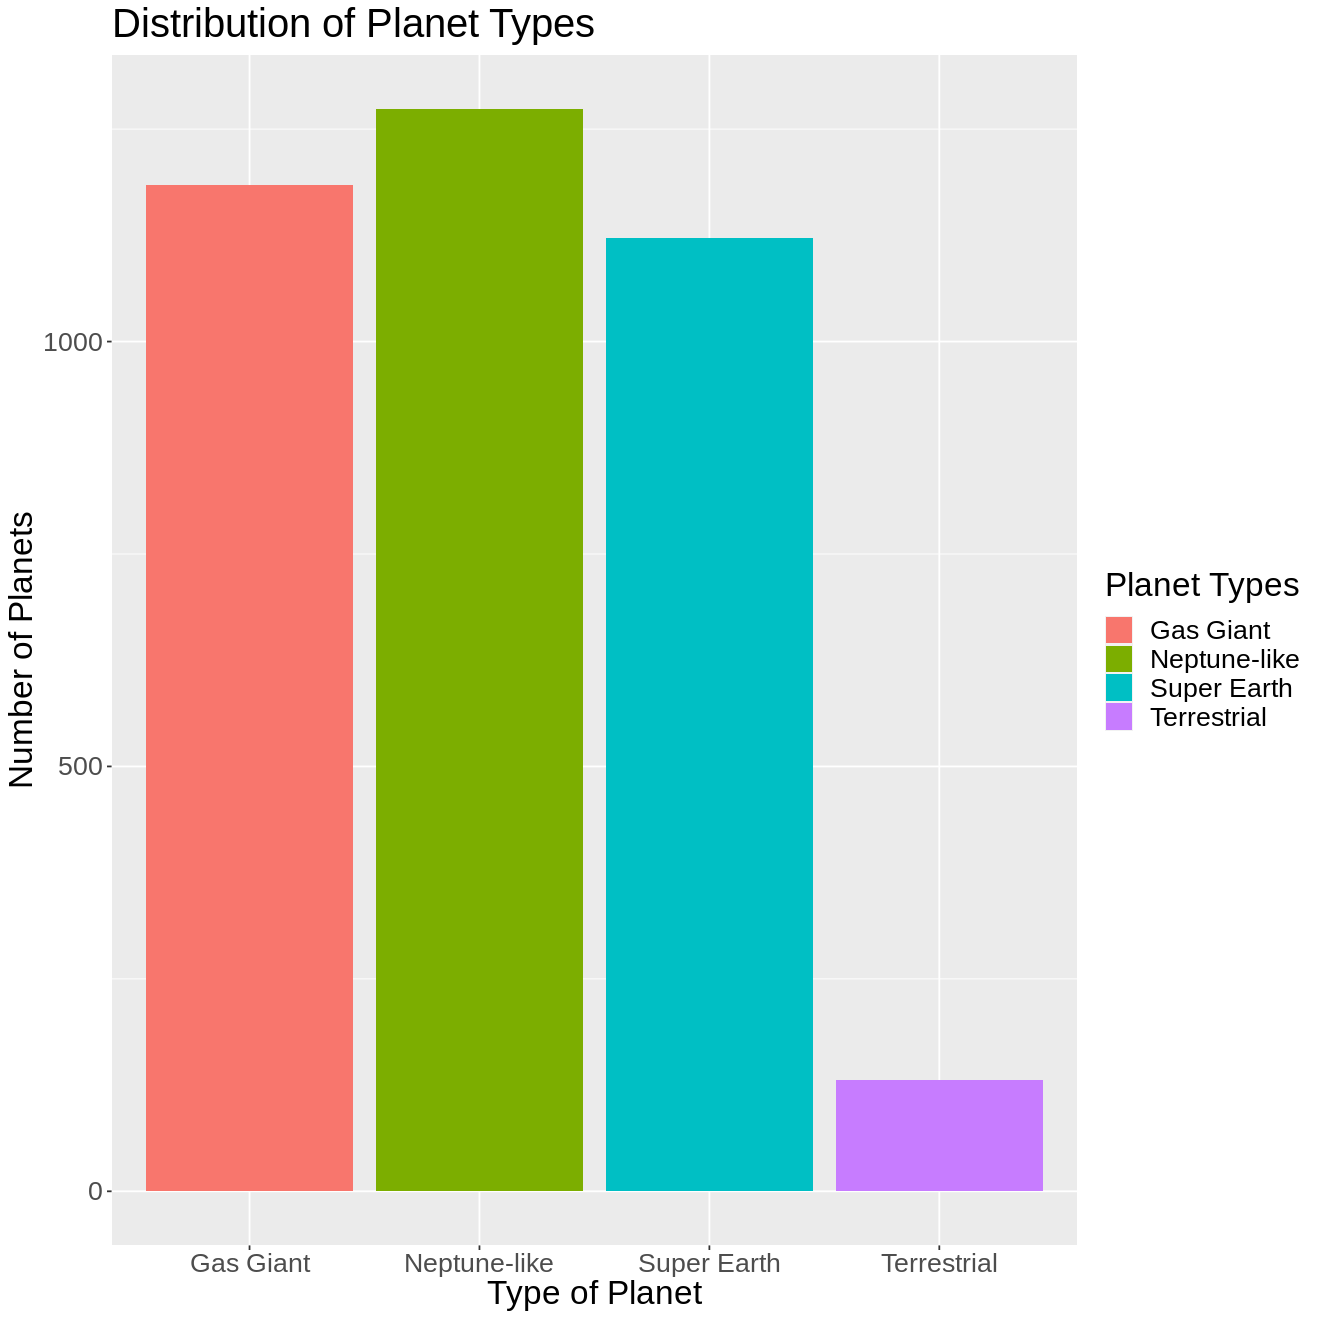

In [7]:
options(repr.plot.width = 11, repr.plot.height = 11)

planet_type_dist <- planet_types |>
    select(-percentage_of_total) |>
    ggplot(aes(x = planet_type, y = number_of_planets, fill = planet_type)) +
    geom_bar(stat = "identity") +
    labs(x = "Type of Planet", y = "Number of Planets", fill = "Planet Types") +
    theme(text = element_text(size = 20)) +
    ggtitle("Distribution of Planet Types")
planet_type_dist

**Data Visualization 2**: How Planetary Radius and Orbital Radius Influences Planet Type

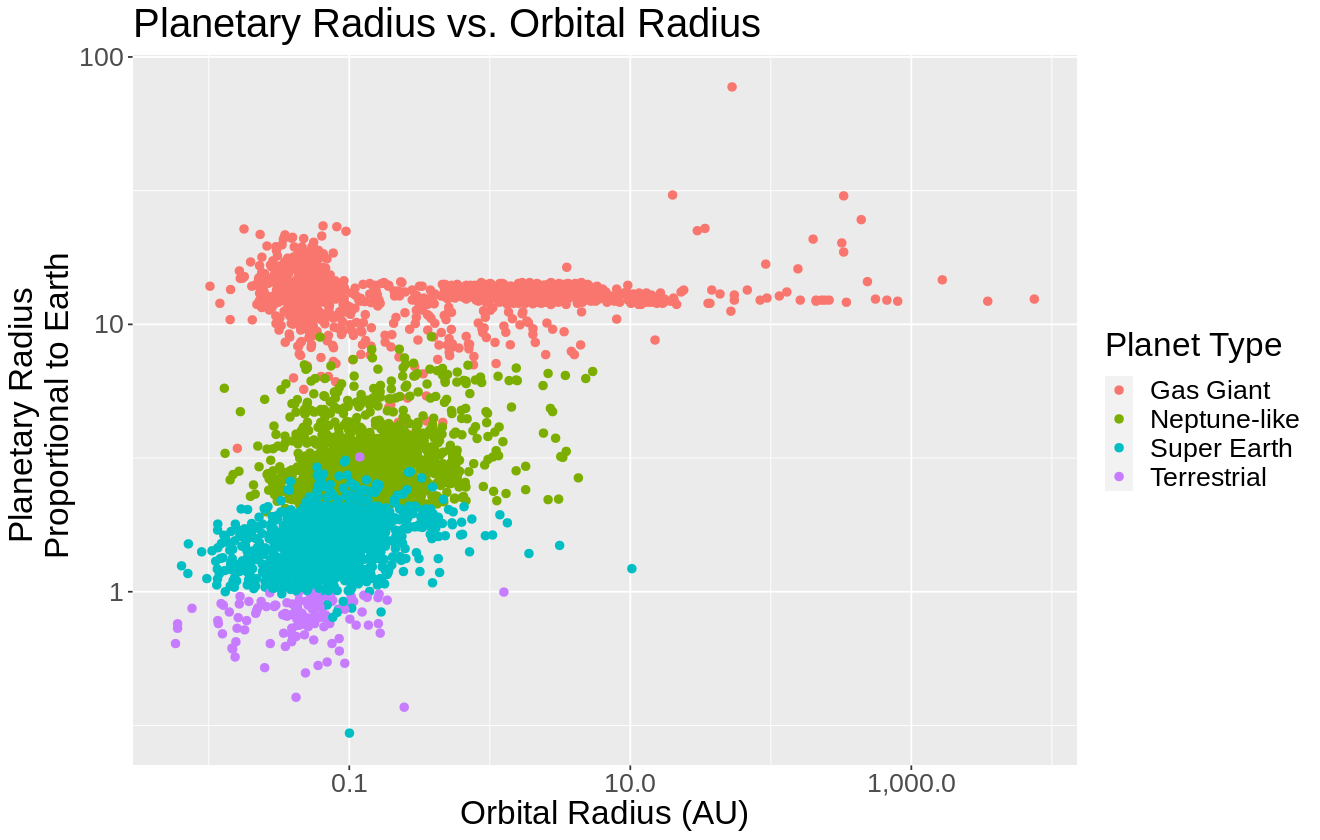

In [8]:
options(repr.plot.width = 11, repr.plot.height = 7)

planet_dist <- data_train |>
    select(planet_type,orbital_radius, planetary_radius_prop) |>
    ggplot(aes(x = orbital_radius, y = planetary_radius_prop, color = planet_type)) +
    geom_point(size = 2) +
    labs(x = "Orbital Radius (AU)", y = "Planetary Radius \n Proportional to Earth", color = "Planet Type") +
    theme(text = element_text(size = 20)) +
    ggtitle("Planetary Radius vs. Orbital Radius") +
    scale_x_log10(labels = label_comma()) +
    scale_y_log10(labels = label_comma())
planet_dist

*Data Analysis*

In our analysis, we created a classification model to predict the planet type based on its planetary radius and orbital radius. We used a k nearest neighbours algorithm to do this. First,  we made a recipe to scale and center the data, as the scale of the orbital radius was at a much greater magnitude than the planetary radius. Next, we determined the k value that would yield the highest accuracy by making 5 folds in the data using the vfold_cv function and creating a workflow with resampling. After running the data through workflow, we plotted the accuracy that was obtained from this cross-validation. When accuracy was graphed, it appeared relatively consistent across several k values, however, k = 5 was the highest. 

 Using k=5 for our model, we combined our model and our recipe into a workflow fit to the training data. We performed our prediction first on the training data and then test data. Our predictions were stored under .predclass.  To see our prediction accuracy, we used the metrics function to display our accuracy with 1 being a perfect score. Our prediction accuracy was columned under .estimate.

! Fold1: internal:
  No observations were detected in `truth` for level(s): 'Unknown'
  Computation will proceed by ignoring those levels.

! Fold2: internal:
  No observations were detected in `truth` for level(s): 'Unknown'
  Computation will proceed by ignoring those levels.

! Fold3: internal:
  No observations were detected in `truth` for level(s): 'Unknown'
  Computation will proceed by ignoring those levels.

! Fold4: internal:
  No observations were detected in `truth` for level(s): 'Unknown'
  Computation will proceed by ignoring those levels.

! Fold5: internal:
  No observations were detected in `truth` for level(s): 'Unknown'
  Computation will proceed by ignoring those levels.



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.9350649,5,0.003305792,Preprocessor1_Model1
2,roc_auc,hand_till,0.9791581,5,0.001831394,Preprocessor1_Model1
3,accuracy,multiclass,0.9598548,5,0.003154904,Preprocessor1_Model2
3,roc_auc,hand_till,0.9823541,5,0.002619942,Preprocessor1_Model2
4,accuracy,multiclass,0.9598548,5,0.003154904,Preprocessor1_Model3
4,roc_auc,hand_till,0.9824297,5,0.002462774,Preprocessor1_Model3
5,accuracy,multiclass,0.9652388,5,0.003468967,Preprocessor1_Model4
5,roc_auc,hand_till,0.9825880,5,0.002342937,Preprocessor1_Model4
6,accuracy,multiclass,0.9652388,5,0.003468967,Preprocessor1_Model5


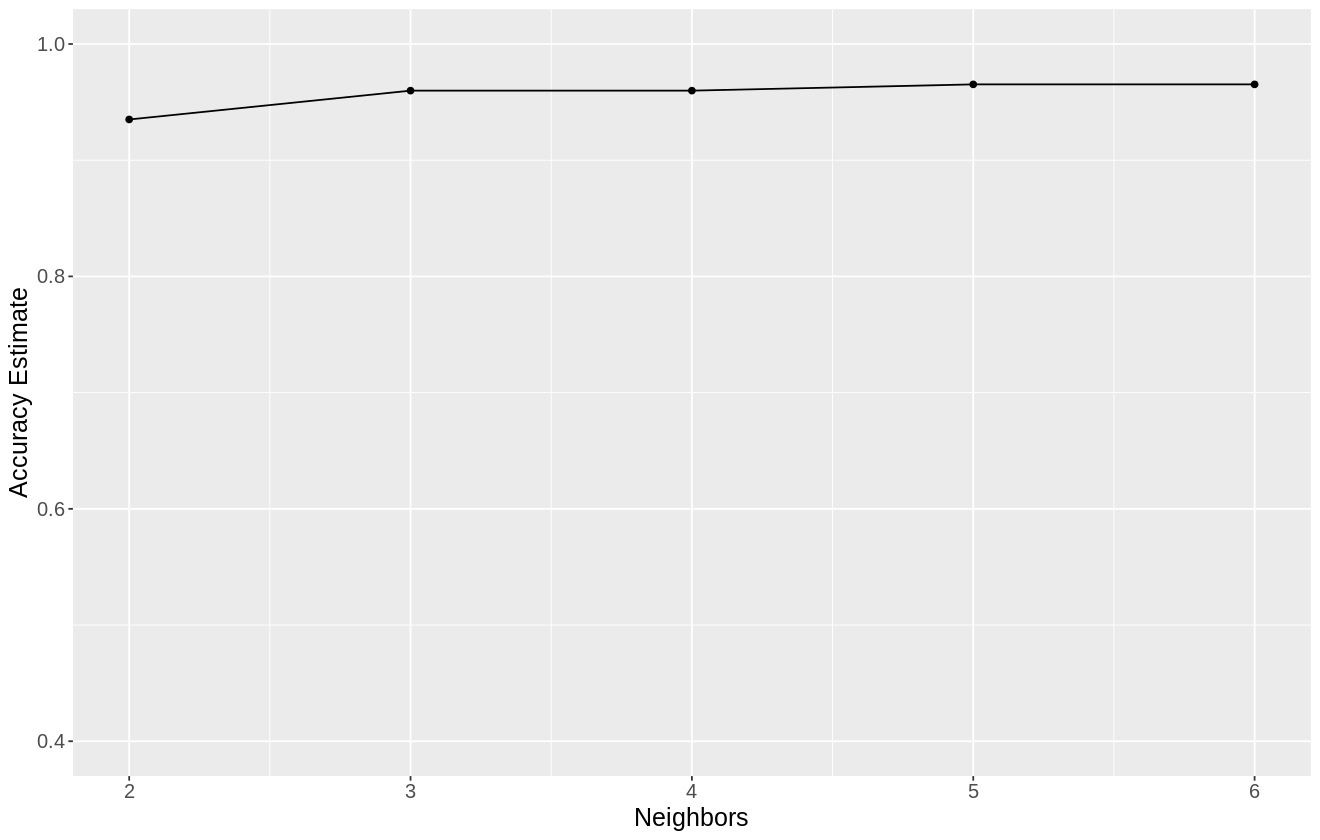

In [9]:
set.seed(1)
planet_recipe <- recipe(planet_type ~ orbital_radius + planetary_radius_prop  , data = data_train) |>
    step_scale(orbital_radius,planetary_radius_prop) |>
    step_center(orbital_radius,planetary_radius_prop)

knn_tune <- nearest_neighbor(weight_func = "rectangular" , neighbors = tune()) |>
       set_engine("kknn") |>
       set_mode("classification") 

data_vfold <- vfold_cv(data_train, v = 5, strata = planet_type)
k_set <- tibble(neighbors = seq(from =2, to=6, by=1))

knn_results <- workflow() |>
       add_recipe(planet_recipe) |>
       add_model(knn_tune) |>
       tune_grid(resamples = data_vfold, grid = k_set) |>
       collect_metrics()
knn_results

accuracies <- knn_results |> 
      filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       theme(text = element_text(size = 15)) +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
cross_val_plot


In [10]:
set.seed(1)
options(repr.plot.height = 5, repr.plot.width = 6)


planet_recipe <- recipe(planet_type ~ orbital_radius + planetary_radius_prop  , data = data_train) |>
    step_scale(orbital_radius,planetary_radius_prop) |>
    step_center(orbital_radius,planetary_radius_prop)


planet_spec <- nearest_neighbor(weight_func = "rectangular" , neighbors = 5) |>
       set_engine("kknn") |>
       set_mode("classification")

planet_fit <- workflow() |>
       add_recipe(planet_recipe) |>
       add_model(planet_spec) |>
       fit(data = data_train)


planet_train_predictions <- predict( planet_fit, data_train) |>
    bind_cols(data_train)
    head(planet_train_predictions)

planet_prediction_accuracy <- planet_train_predictions |>
        metrics(truth = .pred_class, estimate = planet_type)             
planet_prediction_accuracy

planet_test_predictions <- predict( planet_fit, data_test) |>
    bind_cols(data_test)
    head(planet_test_predictions)

planet_prediction_accuracy2 <- planet_test_predictions |>
        metrics(truth = .pred_class, estimate = planet_type)             
planet_prediction_accuracy2

.pred_class,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,planetary_radius_prop
<fct>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Gas Giant,11 Comae Berenices b,304,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,8.925394e-01,0.23,Radial Velocity,12.0960
Gas Giant,14 Herculis b,58,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000e+00,0.37,Radial Velocity,12.5440
Gas Giant,16 Cygni B b,69,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000e+00,0.68,Radial Velocity,13.4400
Gas Giant,18 Delphini b,249,5.51048,Gas Giant,2008,10.30000,Jupiter,1.110,Jupiter,2.600000,2.700000e+00,0.08,Radial Velocity,12.4320
Gas Giant,1RXS J160929.1-210524 b,454,12.61800,Gas Giant,2008,8.00000,Jupiter,1.664,Jupiter,330.000000,6.505900e+03,0.00,Direct Imaging,18.6368
Gas Giant,24 Bootis b,313,5.59000,Gas Giant,2018,0.91000,Jupiter,1.240,Jupiter,0.190000,8.323066e-02,0.04,Radial Velocity,13.8880


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9657774
kap,multiclass,0.9502291


.pred_class,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method,planetary_radius_prop
<fct>,<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Gas Giant,11 Ursae Minoris b,409,5.01300,Gas Giant,2009,14.74,Jupiter,1.09,Jupiter,1.53,1.4000000,0.08,Radial Velocity,12.208
Gas Giant,14 Andromedae b,246,5.23133,Gas Giant,2008,4.80,Jupiter,1.15,Jupiter,0.83,0.5086927,0.00,Radial Velocity,12.880
Gas Giant,17 Scorpii b,408,5.22606,Gas Giant,2020,4.32,Jupiter,1.15,Jupiter,1.45,1.6000000,0.06,Radial Velocity,12.880
Gas Giant,24 Sextantis c,235,6.45350,Gas Giant,2010,0.86,Jupiter,1.24,Jupiter,2.08,2.4000000,0.29,Radial Velocity,13.888
Gas Giant,2M0437 b,419,16.18600,Gas Giant,2021,4.00,Jupiter,1.16,Jupiter,118.00,3110.6000000,0.00,Direct Imaging,12.992
Gas Giant,2MASS J19383260+4603591 b,1293,12.65100,Gas Giant,2015,1.90,Jupiter,1.20,Jupiter,0.92,1.1115674,0.33,Eclipse Timing Variations,13.440


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9620355
kap,multiclass,0.9451026


*Data Analysis – Visualization*

To visualize the results of our analysis, we made a grid that contained data points that ranged from the minimum to the maximum of both variables and fed this through our workflow. By plotting this overlaid with the training data, we showed the areas of the plot that would result in the prediction of a given planet type.

Based on the visualizations, testing and training set results are very similar in shape, spread, and distribution. It is also evident that Gas Giants are the most prominent planet type, commonly found when planetary radius is large.

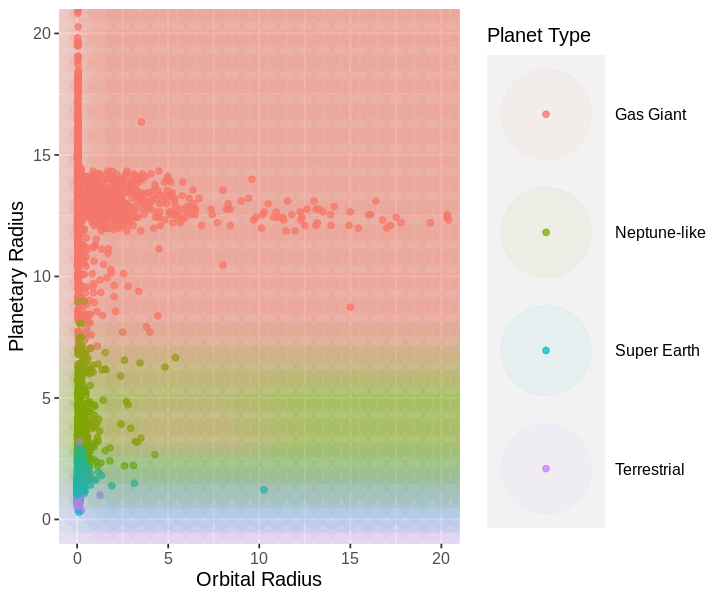

In [11]:
or_grid <- seq(min(data_train$orbital_radius), 
                max(data_train$orbital_radius, by=25))
prp_grid <- seq(min(data_train$planetary_radius_prop), 
                max(data_train$planetary_radius_prop, by=25))
asgrid <- as_tibble(expand.grid(orbital_radius = or_grid, 
                                planetary_radius_prop = prp_grid))
# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(planet_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) |> 
  rename(planet_type = .pred_class)

# plot:
analysis_plot <-ggplot() +
  geom_point(data = data_train, 
             mapping = aes(x = orbital_radius, 
                           y = planetary_radius_prop, 
                           color = planet_type), 
             alpha = 0.75) +
  geom_point(data = prediction_table, 
             mapping = aes(x = orbital_radius, 
                           y = planetary_radius_prop, 
                           color = planet_type), 
             alpha = 0.05, 
             size = 25) +
  labs(color = "Planet Type", 
       x = "Orbital Radius", 
       y = "Planetary Radius") +
  theme(text = element_text(size = 12))+
  coord_cartesian(ylim=c(0,20), xlim=c(0,20))

analysis_plot


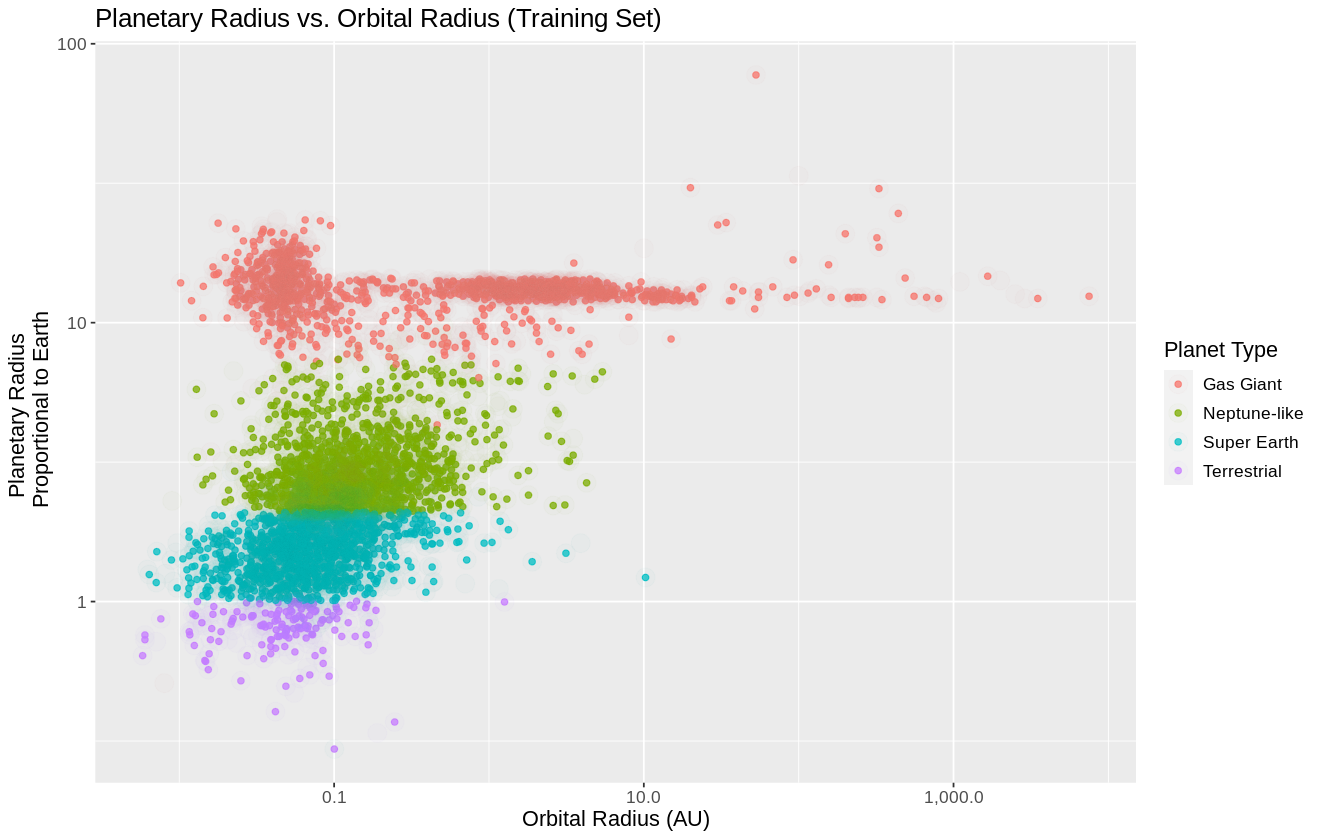

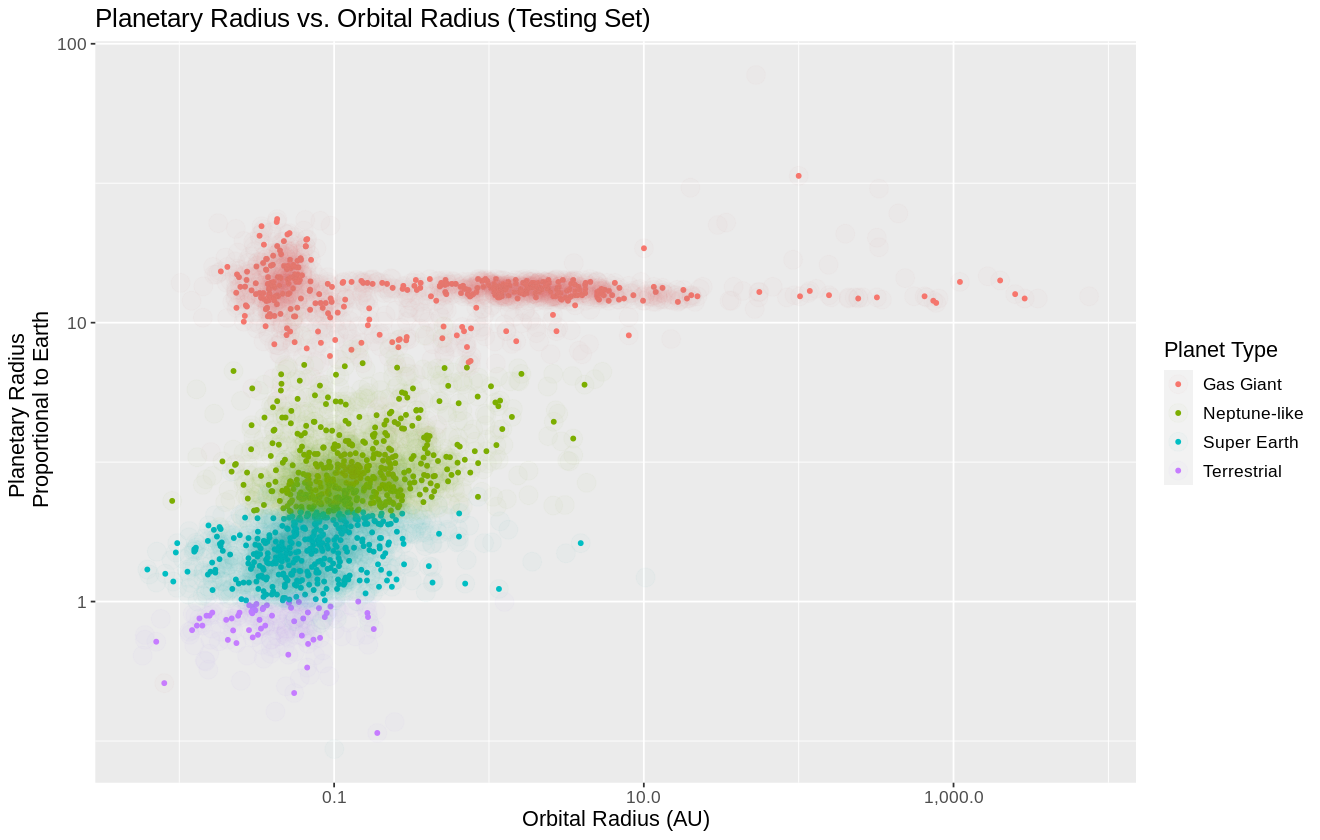

In [15]:
options(repr.plot.width = 11, repr.plot.height = 7)



train_plot <- ggplot()+ geom_point(data = planet_train_predictions , aes(x = orbital_radius , y = planetary_radius_prop , color = .pred_class ) , alpha = 0.75 ) +  labs(x = "Orbital Radius (AU)", y = "Planetary Radius \n Proportional to Earth", color = "Planet Type") +
    theme(text = element_text(size = 13)) +
    ggtitle("Planetary Radius vs. Orbital Radius (Training Set)") +
    geom_point(data = data, 
             mapping = aes(x = orbital_radius, 
                           y = planetary_radius_prop, 
                           color = planet_type), 
             alpha = 0.02, 
             size = 5) +
    scale_x_log10(labels = label_comma()) +
    scale_y_log10(labels = label_comma()) 
train_plot

test_plot <- ggplot(planet_test_predictions, aes(x = orbital_radius , y = planetary_radius_prop , color = .pred_class )) + 
    geom_point(size=1) + 
    labs(x = "Orbital Radius (AU)", y = "Planetary Radius \n Proportional to Earth", color = "Planet Type") +
    theme(text = element_text(size = 13)) +
    ggtitle("Planetary Radius vs. Orbital Radius (Testing Set)")+ 
    geom_point(data = data, 
             mapping = aes(x = orbital_radius, 
                           y = planetary_radius_prop, 
                           color = planet_type), 
             alpha = 0.02, 
             size = 5) +
    scale_x_log10(labels = label_comma()) +
    scale_y_log10(labels = label_comma()) 
test_plot


*Confusion Matrix*: made using conf_mat() function and specifying the accurate planet type labels as well as estimated planet types provided by our classifier. Results show that majority of errors related to other planet types being incorrectly classified as Neptune-like planets.

In [14]:
#confusion matrix
planet_test_predictions |> conf_mat(truth = planet_type, estimate = .pred_class)

              Truth
Prediction     Gas Giant Neptune-like Super Earth Terrestrial Unknown
  Gas Giant          368            5           0           0       0
  Neptune-like        15          417          19           1       0
  Super Earth          0            5         353           0       0
  Terrestrial          1            0           1          53       0
  Unknown              0            0           0           0       0

**Discussion**:

As a result of analyzing our classification model through the comparison of accuracy between testing (true) labels and the predictions, we found that our classifier has a 96.2% classification accuracy. In other words, 96 of 100 planets were correctly classified by our model. Due to the high classifier accuracy statistic, we can comfortably state that exoplanets can be classified into their respective planet types given orbital radius and planetary radius. However, just classifying the planet type using these factors may not be as effective as using more factors. For example, it could be more accurate if the mass of the planet was taken into account as rocky planet types like terrestrial or super-earth are probably more likely to have a higher mass. Furthermore, our estimates are limited to the data from our data set. There will be outliers that do not fit the patterns of the data that our classifier would predict incorrectly. Investigating the influences of other factors like the mass of the planet would be the next step in future classifying models. However, with a 96.2% prediction accuracy, this model is very effective.  

We expected our findings to reflect that smaller planetary radii and orbital radii are rocky planet types and planets with larger planetary radii and orbital radii are gaseous planet types, where both variables hold relatively equal influence. Our classifier accuracy of 96.2% combined with the visualization of results supported our expected findings regarding the relationship between planetary and orbital radii and planet types. However, we discovered that planetary radii have a more significant influence on planet type than orbital radii, as depicted in our “Analysis Plot”, where horizontal lines can be seen to separate the various planet types. We also expected there to be some grey areas when planetary or orbital radii are neither large nor small. The error of 3.8% has supported our expectations in terms of incorrect classification of planet types due to indistinct statistics. After review, supported by statistics displayed in the confusion matrix, it appears that our model has a relatively weak understanding of Neptune-like planet types. To elaborate, when looking at the confusion matrix most cases of misclassification were where non-Neptune-like planets were classified as Neptune-like planets. This was especially the case with Super Earth and Gas Giant planet types, where 15 Gas Giants and 19 Super-Earths were classified by our model as Neptune-like planets. 

Identifying terrestrial planets with composition and gravity similar to that of Earth’s could be impactful as it could lead to discoveries of life in other areas of our galaxy. If other planets are similar to Earth, it is reasonable to explore the possibility that the conditions that lead to life here could also lead to life elsewhere.
Using this confirmed relation between orbital radius, planetary radius, and planet type, we could simplify planet classification to accelerate the discovery of planets of certain types. For example, if you wanted to specifically look for a Super-Earth, the relationship proved by our classifier would allow for the assumption that only planets with smaller orbital and planetary radii should be examined. This saving on costs and analysis time would allow for a deeper examination of other variables or traits of the determined planets.

Given the classification error, a future question could be what other predictor variable has a significant influence on planet types; when orbital and planetary radii are constant, what variables contribute to classifying a planet? As stated earlier in the discussion, a potential predictor variable that could help make the classification more accurate is the mass of the planet, but this would need to be confirmed by future studies. 
Some further questions we could ask is if the planet is habitable. We determined what type of planet it is and from there we could further narrow down to its habitability. Another question this could lead to is if this planet could be colonized by humans - how far away is it from Earth? This could result in some interesting discoveries that could lead humans to colonize planets that are already habitable across galaxies in the future instead of trying to make uninhabitable planets habitable like Mars.

**References**

Jones, B. (2008). Exoplanets – search methods, discoveries, and prospects for astrobiology. International Journal of Astrobiology, 7(3-4), 279-292. doi:10.1017/S147355040800428X

Mishra, A. (2023). NASA Exoplanets. Retrieved 2023, from https://www.kaggle.com/datasets/adityamishraml/nasaexoplanets?select=cleaned_5250.csv. 

NASA. (2023). Sellers exoplanet environments collaboration (SEEC). NASA. Retrieved April 12, 2023, from https://seec.gsfc.nasa.gov/what_makes_a_planet_habitable.html#:~:text=The%20standard%20definition%20for%20a,water%2C%20energy%2C%20and%20nutrients. 

Otegi, J. F., Bouchy, F., & Helled, R. (2020). Revisited mass-radius relations for exoplanets below 120 m⊕. Astronomy & Astrophysics, 634. https://doi.org/10.1051/0004-6361/201936482 

Papiewski, J. (2019, March 2). Three major characteristics of the inner planets. Sciencing. Retrieved April 12, 2023, from https://sciencing.com/three-major-characteristics-inner-planets-12917.html 